In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
## Part 1. Data Generation
mean_01 = np.array([1.0,0.5])
mean_02 = np.array([5.5, 6.6])

cov_01 = np.array( [ [1.0,0.1], [ 0.1,1.2 ] ])
cov_02 = np.array( [ [1.0,0.1], [0.1,1.0] ])


In [13]:
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)
print dist_01.shape, dist_02.shape

(500, 2) (500, 2)


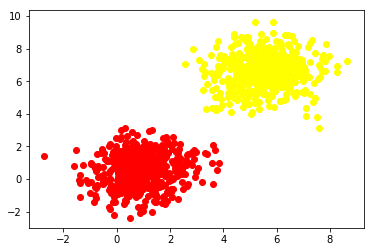

In [15]:
plt.scatter(dist_01[:,0], dist_01[:,1], c = 'red')
plt.scatter(dist_02[:,0], dist_02[:, 1], c='yellow')
plt.show()

In [18]:
## Generating the data matrix
data = np.concatenate( (dist_01,dist_02) )
print data.shape

d_hstck = np.hstack((dist_01,dist_02)) ## Concat along Columns
print d_hstck.shape

d_vstack = np.vstack( (dist_01,dist_02) ) ## Concat Along Rows
print d_vstack.shape

(1000, 2)
(500, 4)
(1000, 2)


In [20]:
## Part 2 : Initialisation of Clustering Problem
K = 4
cluster = {}
colors = ['yellow','red','pink','blue']
for cx in range(K):
    cluster_vals = {
        'centroid' : np.random.uniform(low=data.min(), high=data.max(), size = data.shape[1] ),
        'points' : [] ,
        'history' : [],
        'color': colors[cx]
    }
    cluster[cx] = cluster_vals
n_steps = 3 

In [21]:
def distance(p1,p2):
    return np.sqrt( ( (p1-p2)**2 ).sum() )

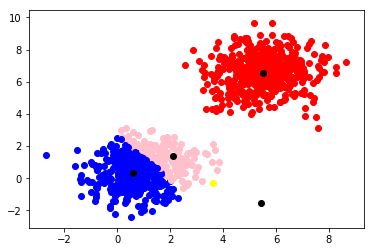

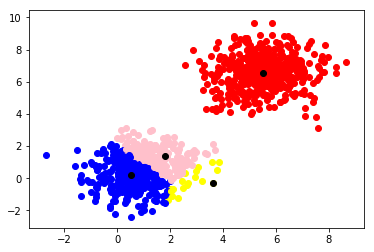

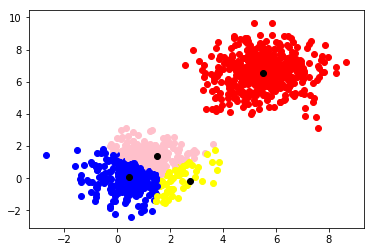

In [25]:
## Part 3 Execution Logic
for ix in range(n_steps):
    
    plt.figure(ix)
    
    for bx in range(data.shape[0]):
        d = []
        
        for cx in range(K):
            dis = distance(data[bx],cluster[cx]['centroid'])
            d.append(dis)
            
        d = np.asarray(d)
        c_id = np.argmin(d) ## Step 1 - Assigned cluster id to particular point
        cluster[c_id]['points'].append(data[bx])
        plt.scatter(data[bx,0], data[bx,1], c = cluster[c_id]['color'])
        
    for cx in range(K):
        plt.scatter( cluster[cx]['centroid'][0], cluster[cx]['centroid'][1], c= 'black' )
        
    ## Step 2 - Update the cluster centroid
    for cx in range(K):
        cluster[cx]['history'].append( cluster[cx]['centroid'] )
        if (len(cluster[cx]['points']) != 0):
            mean_value = np.mean(np.array(cluster[cx]['points']),axis = 0)
            cluster[cx]['centroid'] = mean_value
        cluster[cx]['points'] = []
    plt.show()

In [27]:
import sklearn
from sklearn.cluster import KMeans